<a href="https://colab.research.google.com/github/heitor-eng/H_Data_Science/blob/master/Matplotlib_Real_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse colab é feito dos exemplos do site [Real Python](https://realpython.com/python-matplotlib-guide/) da explicação de como funciona a biblioteca Matplotlib

In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
np.random.seed(444)

**Understanding `plt.subplots()` Notion**

Alright, enough theory. Now, we’re ready to tie everything together and do some plotting. From here on out, we’ll mostly rely on the stateless (object-oriented) approach, which is more customizable and comes in handy as graphs become more complex.

The prescribed way to create a Figure with a single Axes under the OO approach is (not too intuitively) with plt.subplots(). This is really the only time that the OO approach uses pyplot, to create a Figure and Axes:

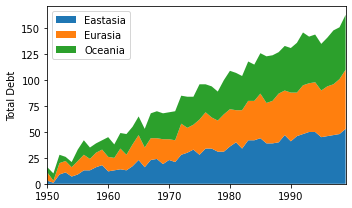

In [15]:
# Understanding plt.subplots() Notion
rng = np.arange(50)
rnd = np.random.randint(0,10,size =(3,rng.size))
yrs = 1950 + rng

fig, ax = plt.subplots(figsize=(5,3))
ax.stackplot(yrs,rng+rnd,labels = ['Eastasia','Eurasia','Oceania'])
ax.legend(loc =  'upper left')
ax.set_ylabel("Total Debt")
ax.set_xlim(xmin=yrs[0],xmax =yrs[-1])
fig.tight_layout()

Here’s what’s going on above:

* After creating three random time series, we defined one `Figure (fig)` containing one Axes (a plot, `ax`).

* We call methods of `ax` directly to create a stacked area chart and to add a legend, title, and y-axis label. Under the object-oriented approach, it’s clear that all of these are attributes of `ax`.

* `tight_layout()` applies to the Figure object as a whole to clean up whitespace padding.


---


Let’s look at an example with multiple subplots (Axes) within one Figure, plotting two correlated arrays that are drawn from the [discrete uniform distribution](https://en.wikipedia.org/wiki/Discrete_uniform_distribution):

`np.column_stack` [Documentation](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html?highlight=column_stack#numpy.column_stack)

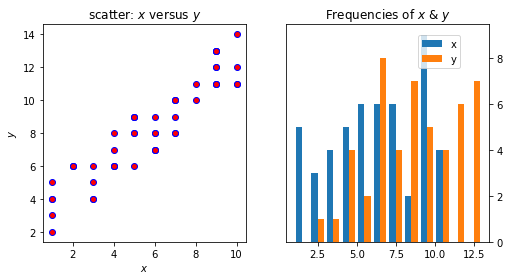

In [16]:
x = np.random.randint(low=1,high=11,size=50)
y = x + np.random.randint(1, 5, size=x.size) 
data = np.column_stack((x, y))

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols = 2, figsize=(8,4))

ax1.scatter(x=x, y=y, marker ='o', c = 'r', edgecolor = 'b')
ax1.set_title('scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel("$y$")

ax2.hist(data, bins =np.arange(data.min(),data.max()),label=('x','y'))
ax2.legend(loc=(0.65,0.8))
ax2.set_title("Frequencies of $x$ & $y$")
ax2.yaxis.tick_right()

There’s a little bit more going on in this example:

Because we’re creating a “1x2” Figure, the returned result of `plt.subplots(1, 2)` is now a Figure object and a NumPy array of Axes objects. (You can inspect this with `fig, axs = plt.subplots(1, 2)` and taking a look at `axs`.)

We deal with `ax1` and `ax2` individually, which would be difficult to do with the stateful approach. The final line is a good illustration of the object hierarchy, where we are modifying the `yaxis` belonging to the second Axes, placing its ticks and ticklabels to the right.

Text inside dollar signs utilizes [TeX markup](https://en.wikipedia.org/wiki/TeX) to put variables in italics.

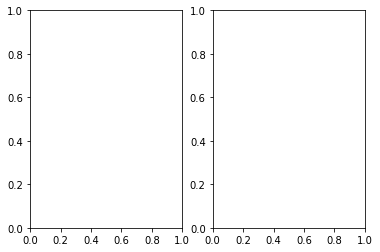

In [17]:
fig, axs = plt.subplots(1,2)

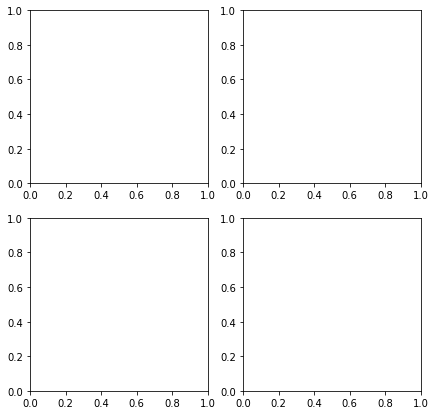

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

We now need to call plotting methods on each of these Axes (but not the NumPy array, which is just a container in this case). A common way to address this is to use iterable unpacking after flattening the array to be one-dimensional:

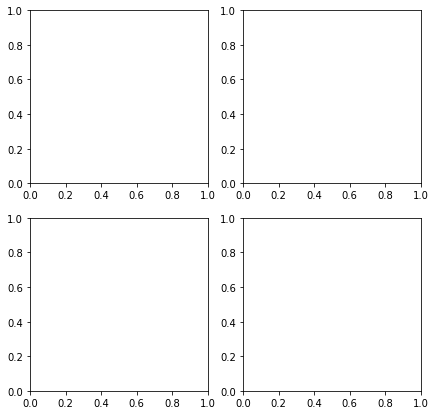

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))
ax1, ax2, ax3, ax4 = ax.flatten()  # flatten a 2d NumPy array to 1d
# or ((ax1, ax2), (ax3, ax4)) = ax

To illustrate some more advanced subplot features, let’s pull some macroeconomic California housing data extracted from a compressed tar archive, using io, tarfile, and urllib from Python’s Standard Library.

In [20]:
from io import BytesIO
import tarfile
from urllib.request import urlopen

url = 'http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.tgz'
b = BytesIO(urlopen(url).read())
fpath = 'CaliforniaHousing/cal_housing.data'

with tarfile.open(mode = 'r',fileobj=b) as archive:
  housing = np.loadtxt(archive.extractfile(fpath),delimiter=',')

The “response” variable y below, to use the statistical term, is an area’s average home value. pop and age are the area’s population and average house age, respectively:

In [21]:
y = housing[:,-1]
pop, age = housing[:,[4,7]].T

Next let’s define a “helper function” that places a text box inside of a plot and acts as an “in-plot title”:

In [22]:
def add_titlebox(ax,text):
    ax.text(.55, .8, text,
       horizontalalignment='center',
       transform = ax.transAxes,
       bbox= dict(facecolor ='white',alpha =0.6),
       fontsize = 12.5)
    return ax

We’re ready to do some plotting. Matplotlib’s gridspec module allows for more subplot customization. pyplot’s `subplot2grid()` interacts with this module nicely. Let’s say we want to create a layout like this


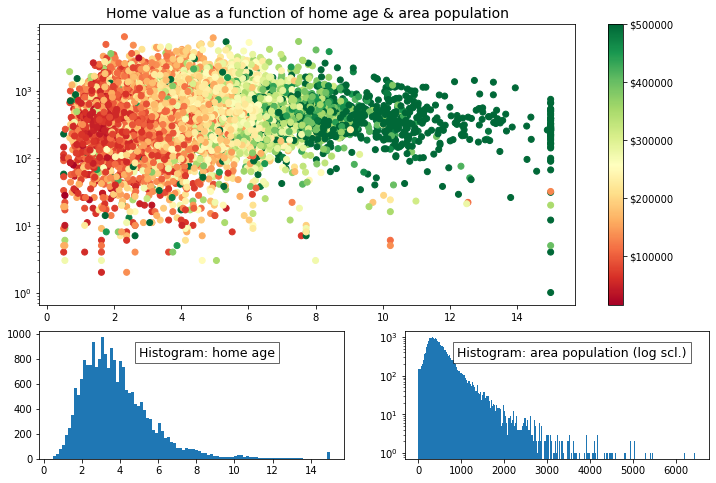

In [23]:
gridsize = (3,2)
fig = plt.figure(figsize=(12,8))
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan =2)
ax2 = plt.subplot2grid(gridsize,(2,0))
ax3 = plt.subplot2grid(gridsize,(2,1))

ax1.set_title('Home value as a function of home age & area population', fontsize=14)
sctr = ax1.scatter(x=age, y=pop, c=y, cmap= 'RdYlGn')
plt.colorbar(sctr, ax=ax1, format='$%d')
ax1.set_yscale('log')
ax2.hist(age,bins ='auto')
ax3.hist(pop,bins = 'auto', log = True)

add_titlebox(ax2,'Histogram: home age')
add_titlebox(ax3,'Histogram: area population (log scl.)')

Above, colorbar() (different from ColorMap earlier) gets called on the Figure directly, rather than the Axes. Its first argument uses Matplotlib’s .scatter() and is the result of ax1.scatter(), which functions as a mapping of y-values to a ColorMap.

Visually, there isn’t much differentiation in color (the y-variable) as we move up and down the y-axis, indicating that home age seems to be a stronger determinant of house value.

Now, we can proceed as normal, modifying each Axes individually:

Be cognizant of this if running a script where you’re creating a group of figures. You’ll want to explicitly close each of them after use to avoid a MemoryError. By itself, plt.close() closes the current figure, plt.close(num) closes the figure number num, and plt.close('all') closes all the figure windows:

In [25]:
#plt.close('all')
#get_all_figures()

**A Burst of Color: imshow() and matshow()**

While ax.plot() is one of the most common plotting methods on an Axes, there are a whole host of others, as well. (We used ax.stackplot() above. You can find the complete list here.)
Methods that get heavy use are imshow() and matshow(), with the latter being a wrapper around the former. These are useful anytime that a raw numerical array can be visualized as a colored grid.

First, let’s create two distinct grids with some fancy NumPy indexing:

**Plotting in Pandas**

The pandas library has become popular for not just for enabling powerful [data analysis](https://realpython.com/analyzing-obesity-in-england-with-python/), but also for its handy pre-canned plotting methods. Interestingly though, [pandas plotting](https://realpython.com/pandas-plot-python/) methods are really just convenient wrappers around existing matplotlib calls.

That is, the plot() method on pandas’ Series and DataFrame is a wrapper around plt.plot(). One convenience provided, for example, is that if the DataFrame’s Index consists of dates, gcf().autofmt_xdate() is called internally by pandas to get the current Figure and nicely auto-format the x-axis.

In turn, remember that plt.plot() (the state-based approach) is implicitly aware of the current Figure and current Axes, so pandas is following the state-based approach by extension.

We can prove this “chain” of function calls with a bit of introspection. First, let’s construct a plain-vanilla pandas Series, assuming we’re starting out in a fresh interpreter session:

In [26]:
# All the styles available to use when you are working with matplotlib
plt.style.available
['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight',
 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk',
 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale',
 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted',
 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'seaborn-white',
 'dark_background', 'seaborn-poster', 'seaborn-deep']



['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [27]:
plt.style.use('fivethirtyeight')

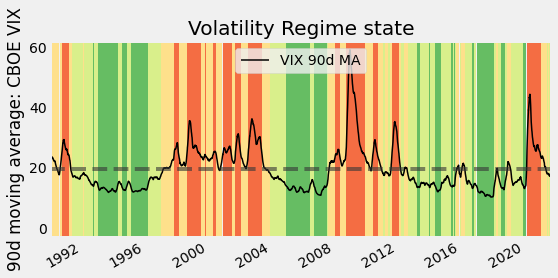

In [35]:
import pandas as pd
import matplotlib.transforms as mtransforms

url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?id=VIXCLS'
vix = pd.read_csv(url,index_col = 0, parse_dates = True, na_values ='.', infer_datetime_format = True, squeeze= True).dropna()

ma = vix.rolling('90d').mean()
state = pd.cut(ma, bins = [-np.inf, 14, 18, 24,np.inf], labels = range(4))

cmap = plt.get_cmap('RdYlGn_r')
ma.plot(color = 'black', linewidth = 1.5, marker = '', figsize = (8,4),label = 'VIX 90d MA')

ax = plt.gca() # Get the current Axes that ma.plot() references
ax.set_xlabel('')
ax.set_ylabel('90d moving average: CBOE VIX')
ax.set_title('Volatility Regime state')
ax.grid(False)
ax.legend(loc = 'upper center')
ax.set_xlim(xmin=ma.index[0],xmax=ma.index[-1])

trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
for i, color in enumerate(cmap([0.2,0.4,0.6,0.8])):
    ax.fill_between(ma.index, 0, 1, where=state==i,facecolor = color, transform = trans)
ax.axhline(vix.mean(),linestyle = 'dashed', color = 'xkcd:dark grey', alpha = 0.6, label = 'Full period mean', marker='')
